## Import Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,plot_roc_curve
import re

In [8]:
data = pd.read_csv("Combined_News_DJIA.csv")
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


## Text Preprocessing

C:\Users\isham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

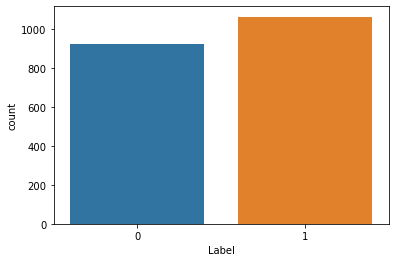

In [11]:
import seaborn as sns
sns.countplot(data.Label)

Here, data is balanced

Let's check null values, although it can be handled by naive bayes algo

In [12]:
print(data.isnull().sum())
data.fillna('',inplace=True)

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


Let's tokenize the sentence and remove stop words

In [13]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
documents=[]
for row in range(len(data)):
    output_words=[]
    for feature in range(2,len(data.iloc[0])):
        word = re.split('\W+',data.iloc[row,feature])
        for w in word:
            if len(w) < 3:     # ignoring words having length less than 3
                continue
            if w.lower() not in stop_words and w.isalpha():
                output_words.append(w.lower())
    documents.append([data.iloc[row,0],data.iloc[row,1],output_words])   # appending cleaned words of doc with category of doc

In [14]:
documents=pd.DataFrame(documents,columns=['Date','Lable','words'])
documents.head(2)

,Date,Lable,words
0,2008-08-08,0,"[georgia, downs, two, russian, warplanes, coun..."
1,2008-08-11,1,"[wont, america, nato, help, wont, help, help, ..."


In [15]:
## Split the data
train = documents[documents['Date'] < '20150101']
test = documents[documents['Date'] > '20141231']

In [16]:
len(test),len(train)

(378, 1863)

In [17]:
feature_list=[]
for i in range(len(train)):
    feature_list.extend( train.iloc[i,2] )        ## to store every cleaned word
feature_list
feature_list=set(feature_list)
len(feature_list)

31977

## Now we have our feature list, it's time to create our bag of words

In [18]:
def get_dataset(data):
    x = pd.DataFrame(data=np.zeros((len(data),len(feature_list)),dtype=int),columns=feature_list)
    y = []      # for y dataset
    i=-1       # for row index
    for row in range(len(data)):     # for every document
        i = i+1
        y.append(data.iloc[row,1])       # appending category
        for word in data.iloc[row,2]:
            if word in feature_list:  # if word is in feature_list 
                x.loc[i,word] += 1           # increase count for that doc in x dataset for respective document/ row                  
    y = np.array(y) # converting from list to np array
    y = y.reshape(-1,)    # reshaping
    x = x.iloc[:].values   # taking x values
    return x,y

In [19]:
# building dataset
x_train,y_train = get_dataset(train)
x_test,y_test = get_dataset(test)

In [20]:
x_train=pd.DataFrame(x_train,columns=feature_list)
x_test=pd.DataFrame(x_test,columns=feature_list)
y_train=pd.DataFrame(y_train,columns=['Label'])
y_test=pd.DataFrame(y_test,columns=['Label'])

In [21]:
# text classification using sklearn Multinomial naive bayes
clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

C:\Users\isham\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
print(clf.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8253968253968254
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       186
           1       0.81      0.85      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.82      0.83       378
weighted avg       0.83      0.83      0.83       378

[[148  38]
 [ 28 164]]


# Implement Naive bayes from Scratch

In [23]:
# implementing using own naive bayes for text classification
def fit(X_train, Y_train):
    result = {}
    class_values = set(Y_train)   # classes of Y_train
    
    result["total_data"] = len(Y_train)   # no. of times all classes in Y_train
    for current_class in class_values:
        result[current_class] = {}       # for each feature will hold count words in current_class
        result[current_class]["total_count"] = 0   # total count of words in current_class
        
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows] # X_train having current_class
        Y_train_current = Y_train[current_class_rows] # Y_train having current_class
        result[current_class]['total_time_class']= len(Y_train_current)  # no. of times current_class in Y_train
        num_features = X_train.shape[1]   # total columns/features
        
        for j in range(0, num_features ):      # for every word
            result[current_class][j] = X_train_current[:,j].sum()   # count of words in current_class
            result[current_class]["total_count"] += result[current_class][j]         
    #print(result)      
    return result

In [24]:
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_time_class"]) - np.log(dictionary["total_data"])  # probability of y in current_class     
    num_features = len(dictionary[current_class].keys())-2   # -2 due to 'total_count' and 'total_time_class'  
    for j in range(0, num_features):  # for every feature/column
        if x[j] == 0:       # if x in testing data ... for current column is zero ..then skip that x column
            continue
        count_xj_within_current_class = dictionary[current_class][j] + 1         
        count_current_class = dictionary[current_class]["total_count"] + (len(dictionary[current_class].keys())-2)   # plus number of words in vocab         
        current_xj_probablity = np.log(count_xj_within_current_class) - np.log(count_current_class)            
        output = output + current_xj_probablity
    return output

In [25]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()    # list of all features  .. also have 'total_data' will ignore this      a
    best_p = -1000         # best probability 
    best_class = -1        # best y class having best probability 
    first_run = True        
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [26]:
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:       # for every row in X_test
        x_class = predictSinglePoint(dictionary, x)    #return predicted class of y   
        y_pred.append(x_class)
    return y_pred

In [27]:
dictionary = fit(x_train,y_train)
y_predict = predict(dictionary,x_test)

KeyboardInterrupt: 

In [ ]:
print('Scoreboard of text classification\n')
print('Score using inbuilt implemented naive bayes in skearn-> ',clf.score(x_test,y_test))
print('Score using own implemented naive bayes-> ',np.mean(y_predict==y_test))

In [ ]:
# for own implemented naive bayes
print(classification_report(y_test,y_predict))
print('------------------------------')
print(confusion_matrix(y_test,y_predict))

## Let's see if we can improve this score by changing n_gram from 1 to 2

In [46]:
headlines = []
for i in range(len(documents)):
    headlines.append(' '.join(x for x in documents.iloc[i,2]))
documents['headlines']=headlines

In [48]:
documents

,Date,Lable,words,headlines
0,2008-08-08,0,"[georgia, downs, two, russian, warplanes, coun...",georgia downs two russian warplanes countries ...
1,2008-08-11,1,"[wont, america, nato, help, wont, help, help, ...",wont america nato help wont help help iraq bus...
2,2008-08-12,0,"[remember, adorable, year, old, sang, opening,...",remember adorable year old sang opening ceremo...
3,2008-08-13,0,"[refuses, israel, weapons, attack, iran, repor...",refuses israel weapons attack iran report pres...
4,2008-08-14,1,"[experts, admit, legalise, drugs, war, south, ...",experts admit legalise drugs war south osetia ...
...,...,...,...,...
1984,2016-06-27,0,"[barclays, rbs, shares, suspended, trading, ta...",barclays rbs shares suspended trading tanking ...
1985,2016-06-28,1,"[scientists, australia, want, save, great, bar...",scientists australia want save great barrier r...
1986,2016-06-29,1,"[explosion, airport, istanbul, yemeni, former,...",explosion airport istanbul yemeni former presi...
1987,2016-06-30,1,"[jamaica, proposes, marijuana, dispensers, tou...",jamaica proposes marijuana dispensers tourists...


In [49]:
## Split the data
train = documents[documents['Date'] < '20150101']
test = documents[documents['Date'] > '20141231']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train.loc[:,'headlines'])
testdataset=countvector.transform(test.loc[:,'headlines'])

In [55]:
traindataset

<1863x405356 sparse matrix of type '<class 'numpy.int64'>'
	with 522682 stored elements in Compressed Sparse Row format>

In [56]:
# text classification using sklearn Multinomial naive bayes
clf = MultinomialNB()
clf.fit(traindataset,y_train)
y_pred = clf.predict(testdataset)

C:\Users\isham\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [58]:
print(clf.score(testdataset,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.80      0.82       186
           1       0.81      0.87      0.84       192

    accuracy                           0.83       378
   macro avg       0.84      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378

[[148  38]
 [ 25 167]]


#### we only see minor affect on our false negative value

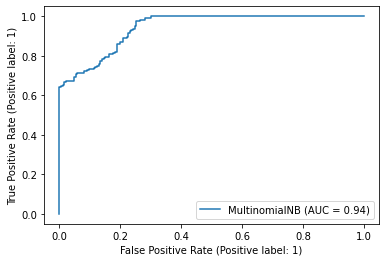

In [62]:
plot_roc_curve(clf,testdataset,y_test)

## lets see if we can improve recall by TfIdf

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
## implement BAG OF WORDS
countvector=TfidfVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train.loc[:,'headlines'])
testdataset=countvector.transform(test.loc[:,'headlines'])

In [64]:
# text classification using sklearn Multinomial naive bayes
clf = MultinomialNB()
clf.fit(traindataset,y_train)
y_pred = clf.predict(testdataset)

C:\Users\isham\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [65]:
print(clf.score(testdataset,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8492063492063492
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.77      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378

[[130  56]
 [  1 191]]


## We can see our false negative rate is only 1% 